# Trabajo Práctico N°3

## Parte I: Análisis de la base de hogares y cálculo de pobreza

#### 1. Exploren el diseño de registro de la base de hogar: a priori, ¿qué variables creen que pueden ser muy predictivas de pobreza y que sería muy útil incluir para perfeccionar el ejercicio del TP2?

En nuestra opinión, creemos que aquellas variables que pueden ser predictivas de la pobreza 

IV1: Tipo de vivienda, cat
IV2: Habitaciones totales
IV3: Pisos interiores, cat
IV4: cubierta ext techo, cat
IV5: tiene revestimiento? cat
IV6: disponibilidad de agua, cat
IV7: servicio de agua, cat
IV8: tiene banio, cat
IV9: donde tiene banio, cat
IV10: como funciona el banio, cat
IV11: como es el desague del banio, cat
IV12 (1,2,3): ubicaciones particulares de la vivienda, cats
II7: Regimen de tenencia, cat
II8: combustible usado para cocinar, cat

#### 2. Descarguen la base de microdatos de la EPH correspondiente al primer trimestre de 2023 (la base de hogares se llama usu_hogar_T123.xls). Importen los datos de la encuesta de hogar y, al igual que en el TP2, conserven sólo las observaciones que corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o del Gran Buenos Aires.

In [2]:
import pandas as pd

# Importamos la base de datos.

df_original_hog = pd.read_excel(r'usu_hogar_T123.xlsx')

# Importamos todos los paquetes que vamos a utilizar a lo largo del Trabajo.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Nos quedamos con los datos correspondientes a los aglomerados de Ciudad Autónoma de Buenos Aires y Gran Buenos Aires.

df_hog = df_original_hog[(df_original_hog['AGLOMERADO'] == 32) | (df_original_hog['AGLOMERADO'] == 33)]

#### 3. Unan la tabla de la encuesta individual con la de la encuesta de hogar

In [4]:
# Importamos la tabla de la encuesta individual.

df_original_ind = pd.read_excel(r'usu_individual_T123.xlsx')

In [5]:
# Para esta encuesta también nos quedamos con los datos correspondientes a los aglomerados de Ciudad Autónoma de Buenos Aires y Gran Buenos Aires.

df_ind = df_original_ind[(df_original_ind['AGLOMERADO'] == 32) | (df_original_ind['AGLOMERADO'] == 33)]

In [6]:
# Unimos las tablas a partir de la columna CODUSU, que refiere al número de identificación del registro y que permite relacionar a las viviendas con los hogares y las personas.

df = df_hog.merge(df_ind, on='CODUSU', how='outer')

df.columns.tolist()
# Observamos todas las columnas resultantes del merge.

['CODUSU',
 'ANO4_x',
 'TRIMESTRE_x',
 'NRO_HOGAR_x',
 'REALIZADA',
 'REGION_x',
 'MAS_500_x',
 'AGLOMERADO_x',
 'PONDERA_x',
 'IV1',
 'IV1_ESP',
 'IV2',
 'IV3',
 'IV3_ESP',
 'IV4',
 'IV5',
 'IV6',
 'IV7',
 'IV7_ESP',
 'IV8',
 'IV9',
 'IV10',
 'IV11',
 'IV12_1',
 'IV12_2',
 'IV12_3',
 'II1',
 'II2',
 'II3',
 'II3_1',
 'II4_1',
 'II4_2',
 'II4_3',
 'II5',
 'II5_1',
 'II6',
 'II6_1',
 'II7',
 'II7_ESP',
 'II8',
 'II8_ESP',
 'II9',
 'V1',
 'V2',
 'V21',
 'V22',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19_A',
 'V19_B',
 'IX_TOT',
 'IX_MEN10',
 'IX_MAYEQ10',
 'ITF_x',
 'DECIFR_x',
 'IDECIFR_x',
 'RDECIFR_x',
 'GDECIFR_x',
 'PDECIFR_x',
 'ADECIFR_x',
 'IPCF_x',
 'DECCFR_x',
 'IDECCFR_x',
 'RDECCFR_x',
 'GDECCFR_x',
 'PDECCFR_x',
 'ADECCFR_x',
 'PONDIH_x',
 'VII1_1',
 'VII1_2',
 'VII2_1',
 'VII2_2',
 'VII2_3',
 'VII2_4',
 'ANO4_y',
 'TRIMESTRE_y',
 'NRO_HOGAR_y',
 'COMPONENTE',
 'H15',
 'REGION_y',
 'MAS_500_y'

In [7]:
print(df.columns.tolist())


['CODUSU', 'ANO4_x', 'TRIMESTRE_x', 'NRO_HOGAR_x', 'REALIZADA', 'REGION_x', 'MAS_500_x', 'AGLOMERADO_x', 'PONDERA_x', 'IV1', 'IV1_ESP', 'IV2', 'IV3', 'IV3_ESP', 'IV4', 'IV5', 'IV6', 'IV7', 'IV7_ESP', 'IV8', 'IV9', 'IV10', 'IV11', 'IV12_1', 'IV12_2', 'IV12_3', 'II1', 'II2', 'II3', 'II3_1', 'II4_1', 'II4_2', 'II4_3', 'II5', 'II5_1', 'II6', 'II6_1', 'II7', 'II7_ESP', 'II8', 'II8_ESP', 'II9', 'V1', 'V2', 'V21', 'V22', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'IX_TOT', 'IX_MEN10', 'IX_MAYEQ10', 'ITF_x', 'DECIFR_x', 'IDECIFR_x', 'RDECIFR_x', 'GDECIFR_x', 'PDECIFR_x', 'ADECIFR_x', 'IPCF_x', 'DECCFR_x', 'IDECCFR_x', 'RDECCFR_x', 'GDECCFR_x', 'PDECCFR_x', 'ADECCFR_x', 'PONDIH_x', 'VII1_1', 'VII1_2', 'VII2_1', 'VII2_2', 'VII2_3', 'VII2_4', 'ANO4_y', 'TRIMESTRE_y', 'NRO_HOGAR_y', 'COMPONENTE', 'H15', 'REGION_y', 'MAS_500_y', 'AGLOMERADO_y', 'PONDERA_y', 'CH03', 'CH04', 'CH05', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10',

#### 4. Generen sus propias funciones para limpiar la base de datos o, si deciden utilizar funciones existentes en paquetes como numpy y pandas, mencionen cuáles usarán y de qué paquetes son.

In [8]:
# Procedemos a crear una función que nos devuelva nuestro Data Frame sin columnas con missing values.

def df_without_missings(df):
    
    pd.set_option('display.max_rows', 10)
    varwithoutmissings = []
    
    missing_values = df.isna().sum()
    missing_values = missing_values.reset_index().rename(columns={'index': 'Variable', 0:'Missings'})
    
    for i in range(0, len(missing_values)):
        if missing_values['Missings'][i] == 0:
            varwithoutmissings.append(missing_values['Variable'][i])

    print('Cantidad de variables con missings:', (len(df.columns)-len(varwithoutmissings)))
    
    df = df[varwithoutmissings]
    
    print('\nShape del nuevo Data Frame:', df.shape)
    
    return df

In [9]:
# Ahora creamos una función que nos devuelva nuestro Data Frame sin columnas duplicadas. A partir del merge de dos Data Frames, hay variables que pueden duplicarse y que, por lo tanto, no aportan información adicional. Procederemos a generar una función que permita eliminar estas columnas del df.

def clean_duplicates(df):
    
    df_original = df.copy()
    df = df.T.drop_duplicates().T

    print('Cantidad de variables duplicadas:', (len(df_original.columns)-len(df.columns)))
    print('\nLista de variables duplicadas:')
          
    for i in range(0,len(df_original.columns)):
        if df_original.columns[i] not in df.columns:
            print(df_original.columns[i])
          
    print('\nShape del nuevo Data Frame:', df.shape)
        
    return df

### Falta funcion que arregle tema outliers y tema modificacion de variables categoricas o string, dependiendo si tienen sentido para los proximos ejercicios

#### 5. Limpien la base de datos tomando criterios que hagan sentido, tanto para el tratamiento de valores faltantes, de outliers, como así también decidan qué variables categóricas y strings usarán y transfórmenlas de forma que haga sentido para los ejercicios siguientes. Justifiquen sus decisiones.

In [10]:
df_without_missings(df)
df = df_without_missings(df)
clean_duplicates(df)
df = clean_duplicates(df)

Cantidad de variables con missings: 113

Shape del nuevo Data Frame: (7686, 151)
Cantidad de variables con missings: 113

Shape del nuevo Data Frame: (7686, 151)
Cantidad de variables duplicadas: 8

Lista de variables duplicadas:
REALIZADA
REGION_x
V19_B
ANO4_y
TRIMESTRE_y
REGION_y
MAS_500_y
AGLOMERADO_y

Shape del nuevo Data Frame: (7686, 143)
Cantidad de variables duplicadas: 8

Lista de variables duplicadas:
REALIZADA
REGION_x
V19_B
ANO4_y
TRIMESTRE_y
REGION_y
MAS_500_y
AGLOMERADO_y

Shape del nuevo Data Frame: (7686, 143)


In [11]:
pd.set_option('display.max_columns', None)
df

,CODUSU,ANO4_x,TRIMESTRE_x,NRO_HOGAR_x,MAS_500_x,AGLOMERADO_x,PONDERA_x,IV1,IV2,IV3,IV4,IV5,IV6,IV7,IV8,IV9,IV10,IV11,IV12_1,IV12_2,IV12_3,II1,II2,II3,II3_1,II4_1,II4_2,II4_3,II5,II5_1,II6,II6_1,II7,II8,II9,V1,V2,V21,V22,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19_A,IX_TOT,IX_MEN10,IX_MAYEQ10,ITF_x,DECIFR_x,RDECIFR_x,GDECIFR_x,ADECIFR_x,IPCF_x,DECCFR_x,RDECCFR_x,GDECCFR_x,ADECCFR_x,PONDIH_x,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4,NRO_HOGAR_y,COMPONENTE,H15,PONDERA_y,CH03,CH04,CH05,CH06,CH07,CH09,CH10,CH11,CH12,CH13,CH15,CH16,NIVEL_ED,ESTADO,CAT_OCUP,CAT_INAC,PP02C1,PP02C2,PP02C3,PP02C4,PP02C5,PP02C6,PP02C7,PP02C8,PP02E,PP02H,PP02I,P21,DECOCUR,RDECOCUR,GDECOCUR,ADECOCUR,PONDIIO,TOT_P12,DECINDR,RDECINDR,GDECINDR,ADECINDR,PONDII,V2_M,V3_M,V4_M,V5_M,V8_M,V9_M,V10_M,V11_M,V12_M,V18_M,V19_AM,V21_M,T_VI,ITF_y,DECIFR_y,RDECIFR_y,GDECIFR_y,ADECIFR_y,IPCF_y,DECCFR_y,RDECCFR_y,GDECCFR_y,ADECCFR_y,PONDIH_y
0,TQRMNORVYHMOTSCDEIJAH00802517,2023,1,1,S,33,1066,1,4,1,4,1,1,1,1,1,1,1,2,2,2,4,2,2,0,1,1,1,2,0,2,0,1,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,0,12,12,12.0,12,0.0,12,12,12.0,12,0,1,0,98,0,0,0,1,1,1,1066,1,2,1976-05-24,46,3,1,2,0,4,1,1,1,4,1,2,0,0,0,0,0,0,0,0,0,0,0,0,-9,12,12,12.0,12,0,0,12,12,12.0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,12,12.0,12,0.0,12,12,12.0,12,0
1,TQRMNORVYHMOTSCDEIJAH00802517,2023,1,1,S,33,1066,1,4,1,4,1,1,1,1,1,1,1,2,2,2,4,2,2,0,1,1,1,2,0,2,0,1,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,0,12,12,12.0,12,0.0,12,12,12.0,12,0,1,0,98,0,0,0,1,2,1,1066,3,2,2003-05-08,19,5,1,2,0,4,1,1,1,4,1,3,0,0,0,0,0,0,0,0,0,0,0,0,56000,3,3,3.0,3,1558,0,3,3,3.0,3,1656,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,12,12.0,12,0.0,12,12,12.0,12,0
2,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,S,33,2270,2,4,1,3,1,1,1,1,1,1,1,2,2,2,4,1,2,0,1,1,1,2,0,2,0,1,1,1,1,2,2,2,2,2,2,2,2,1,2,2,2,2,1,2,2,1,1,2,2,2,0,2,158000,5,5,5.0,5,79000.0,6,6,6.0,7,4733,1,0,2,0,0,0,1,1,1,2270,1,1,1986-09-30,36,1,1,2,0,7,2,1,1,5,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,2270,22000,2,2,2.0,3,4497,0,0,0,0,26000,0,0,0,0,0,0,0,26000,158000,5,5,5.0,5,79000.0,6,6,6.0,7,4733
3,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,S,33,2270,2,4,1,3,1,1,1,1,1,1,1,2,2,2,4,1,2,0,1,1,1,2,0,2,0,1,1,1,1,2,2,2,2,2,2,2,2,1,2,2,2,2,1,2,2,1,1,2,2,2,0,2,158000,5,5,5.0,5,79000.0,6,6,6.0,7,4733,1,0,2,0,0,0,1,2,1,2270,2,2,1984-05-16,38,1,1,1,1,7,2,1,1,5,1,3,0,0,0,0,0,0,0,0,0,0,0,0,37000,2,2,2.0,2,3197,73000,6,6,6.0,7,3590,0,0,0,0,0,0,0,0,0,0,0,0,0,158000,5,5,5.0,5,79000.0,6,6,6.0,7,4733
4,TQSMNOSQRHLLTTCDEIJAH00719389,2023,1,1,S,33,2161,1,3,1,2,1,1,1,1,1,1,1,2,2,2,3,1,2,0,1,1,1,2,0,2,0,1,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,1,0,1,96000,3,2,2.0,3,96000.0,7,7,7.0,8,2672,1,0,98,0,0,0,1,1,1,2161,1,2,1942-09-06,80,4,1,2,0,2,1,1,1,2,3,0,1,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0.0,0,2161,0,6,6,6.0,6,2502,86000,0,0,0,0,0,0,0,0,0,0,0,96000,96000,3,2,2.0,3,96000.0,7,7,7.0,8,2672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7681,TQRMNOSSQHKOOMCDEIJAH00802644,2023,1,1,S,33,3381,1,3,1,2,2,1,1,1,1,1,1,2,2,2,3,2,2,0,1,2,2,2,0,2,0,3,1,1,1,2,2,2,2,2,1,1,1,2,2,2,2,2,1,1,2,2,2,2,2,4,1,3,59000,1,1,1.0,1,14750.0,1,1,1.0,1,4548,1,0,2,0,0,0,1,2,1,3381,3,2,2004-09-10,18,5,1,1,1,4,2,1,1,3,3,0,3,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0.0,0,3381,0,0,0,0.0,0,3381,0,0,0,0,0,0,0,0,0,0,0,0,0,59000,1,1,1.0,1,14750.0,1,1,1.0,1,4548
7682,TQRMNOSSQHKOOMCDEIJAH00802644,2023,1,1,S,33,3381,1,3,1,2,2,1,1,1,1,1,1,2,2,2,3,2,2,0,1,2,2,2,0,2,0,3,1,1,1,2,2,2,2,2,1,1,1,2,2,2,2,2,1,1,2,2,2,2,2,4,1,3,59000,1,1,1.0,1,14750.0,1,

Variables potencialmente que sirven: IV5 (dummy de si el techo tiene cielorraso/revestimiento interior), IV6 (categorica de donde tiene agua), IV8 (dummy si tiene banio o letrina), IV9 (donde esta ubicado el banio o letrina), podria ser iv12_1 o iv12_3, II4_1 (tener cuarto de cocina, ver dentro de la gente q tiene cuarto de cocina como son las rtas de II4_2 e II4_3), V5 (hogar recibió subsidios o ayuda social en dinero), V8 (hogares, terrenos u oficinas de su propiedad que alquilan), V9 (ganancias de negocios en los que no trabajan), V11 (becas de estudio), V16 (compras en cuotas o al fiado con tarjeta de crédito), CH12.



#### 6. Presenten estadisticas descriptivas de cinco variables de la encuesta de hogar que ustedes creen que pueden ser relevantes para predecir pobreza. 

In [12]:
vars = ['IV6', 'IV8', 'IV12_1', 'V5', 'V9']

IV6 es una variable categórica que toma el valor 1 si la vivienda tiene agua por cañería dentro de la vivienda, 2 si tiene agua fuera de la vivienda pero dentro del terreno y 3 si tiene agua fuera del terreno.

La variable IV8 es una dummy que toma valor 1 si la vivienda tiene baño o letrina y 2 en caso contrario.

IV12_1 es una variable dummy que toma valor 1 si la vivienda está ubicada cerca de basural/es (3 cuadras o menos) y 2 en caso contrario.

La variable V5 es una dummy que toma valor 1 si en los tres meses previos a la entrevista las personas del hogar han sido beneficiarios de subsidios o receptores de ayuda social (en dinero) del gobierno, iglesias u otros organismos. El otro valor que puede tomar es 2 y lo hace en el caso de no haber recibido subsidios ni ayudas sociales en dinero en los últimos tres meses.

V9 es una variable dummy que toma valor 1 si en los tres meses previos a la entrevista las personas del hogar obtuvieron ganancias de algún negocio en el que no trabajan, y 2 en caso contrario.

Seleccionamos las variables IV6 e IV8 con el objetivo de detectar características de las viviendas que permitan diferenciar entre una conformada por uno o más hogares pobres y otra ocupada por personas que no se encuentren en situación de pobreza. Estas recaban información sobre servicios básicos para vivir: agua y saneamiento.

La variable IV12_1 fue seleccionada con el objetivo de capturar las viviendas cercanas a basurales, ya que entendemos que estas zonas pueden estar conformadas por viviendas más asequibles debido a la contaminación que procede de los depósitos. Así, IV12_1 captura un componente geográfico asociado a las viviendas de los hogares.

V5 permite capturar una dimensión de la pobreza que es visible para la administración pública. A diferencia de características habitacionales de la vivienda, como las recabadas por las variables ya mencionadas, esta dummy que indica si los hogares recibieron subsidios o ayudas sociales en dinero permite detectar diferencias entre la situación económica de las familias a partir de una dimensión "formal" o de ingresos. Quizás un hogar cuenta con condiciones habitacionales que no nos llevarían a pensar que se encuentra en situación de pobreza, pero es beneficiario de un subsidio debido a que sus ingresos en blanco o formales son lo suficientemente bajos.

Por último, es posible pensar a la variable V9 como una que captura información sobre los ahorros o el patrimonio de los hogares. Entendemos que su utilidad viene por el hecho de que es menos probable que hogares en situación de pobreza cuenten con ingresos de negocios en los que no trabajan, en comparación con familias que no son pobres.

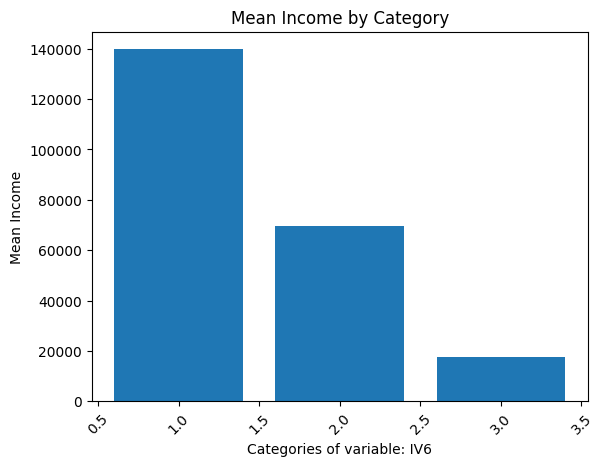

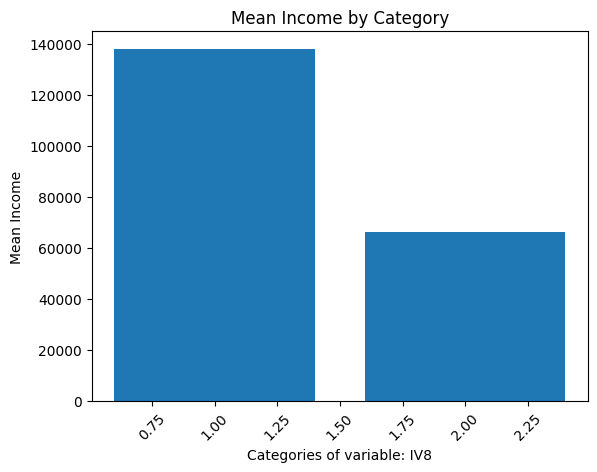

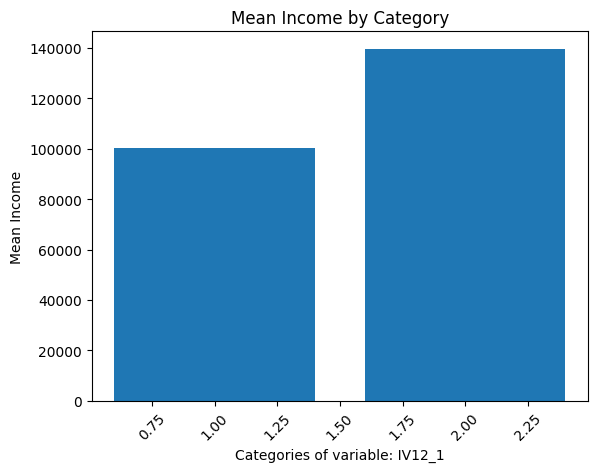

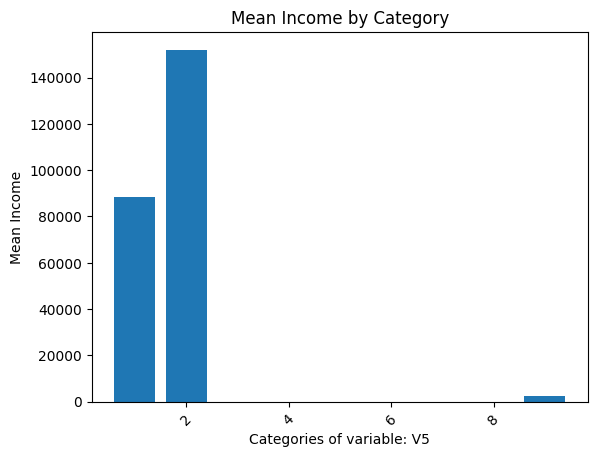

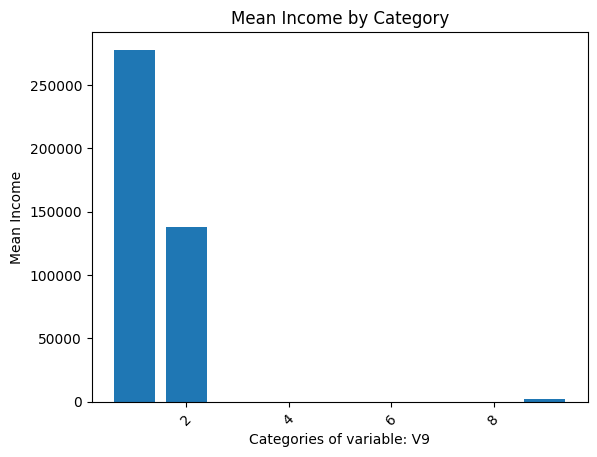

In [13]:
for i in vars:
    mean_income = df.groupby(i)['ITF_x'].mean()

    categories = mean_income.index
    values = mean_income.values
    
    plt.bar(categories, values)

    plt.xlabel('Categories of variable: ' + str(i))
    plt.ylabel('Mean Income')
    plt.title('Mean Income by Category')

    plt.xticks(rotation=45)

    plt.show()

#### 7. Repitan el inciso 1.2.f del TP2 para construir la columna adulto_equiv y la columna ad_equiv_hogar (pueden utilizar su código del TP2).

Generamos dos listas con los valores de adulto equivalente de cada personas según su sexo y edad.

In [14]:
valores_m = [.35,.37,.46,.51,.55,.6,.64,.66,.68,.69,.7,.72,.74,.76,.76,.77,.77,.77,.76,.77,.76,.67,.63]
valores_h = [.35,.37,.46,.51,.55,.6,.64,.66,.68,.69,.79,.82,.85,.9,.96,1,1.03,1.04,1.02,1,1,.83,.74]
df['adulto_equiv'] = 0

A través de un loop y una serie de condicionales imputamos los valores de adulto equivalente para todos los individuos del Data Frame.

In [15]:
modified_rows = []

for j in range(0, 5402, 1):
    row = df.iloc[j].copy()
    if row['CH04'] == 2:
        for i in range(0, 18):
            if row['CH06'] == i:
                row['adulto_equiv'] = valores_m[i]
        if row['CH06'] in range(18,30):
            row['adulto_equiv'] = valores_m[18]
        elif row['CH06'] in range(30,46):
            row['adulto_equiv'] = valores_m[19]
        elif row['CH06'] in range(46,61):
            row['adulto_equiv'] = valores_m[20]
        elif row['CH06'] in range(61,76):
            row['adulto_equiv'] = valores_m[21]
        elif row['CH06'] in range(76,99):
            row['adulto_equiv'] = valores_m[22]
    
    else:
        for i in range(0,18,1):
            if row['CH06'] == i:
                row['adulto_equiv'] = valores_h[i]
        if row['CH06'] in range(18,30):
            row['adulto_equiv'] = valores_h[18]
        elif row['CH06'] in range(30,46):
            row['adulto_equiv'] = valores_h[19]
        elif row['CH06'] in range(46,61):
            row['adulto_equiv'] = valores_h[20]
        elif row['CH06'] in range(61,76):
            row['adulto_equiv'] = valores_h[21]
        elif row['CH06'] in range(76,100):
            row['adulto_equiv'] = valores_h[22]
    modified_rows.append(row)

df = pd.DataFrame(modified_rows)
df

,CODUSU,ANO4_x,TRIMESTRE_x,NRO_HOGAR_x,MAS_500_x,AGLOMERADO_x,PONDERA_x,IV1,IV2,IV3,IV4,IV5,IV6,IV7,IV8,IV9,IV10,IV11,IV12_1,IV12_2,IV12_3,II1,II2,II3,II3_1,II4_1,II4_2,II4_3,II5,II5_1,II6,II6_1,II7,II8,II9,V1,V2,V21,V22,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19_A,IX_TOT,IX_MEN10,IX_MAYEQ10,ITF_x,DECIFR_x,RDECIFR_x,GDECIFR_x,ADECIFR_x,IPCF_x,DECCFR_x,RDECCFR_x,GDECCFR_x,ADECCFR_x,PONDIH_x,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4,NRO_HOGAR_y,COMPONENTE,H15,PONDERA_y,CH03,CH04,CH05,CH06,CH07,CH09,CH10,CH11,CH12,CH13,CH15,CH16,NIVEL_ED,ESTADO,CAT_OCUP,CAT_INAC,PP02C1,PP02C2,PP02C3,PP02C4,PP02C5,PP02C6,PP02C7,PP02C8,PP02E,PP02H,PP02I,P21,DECOCUR,RDECOCUR,GDECOCUR,ADECOCUR,PONDIIO,TOT_P12,DECINDR,RDECINDR,GDECINDR,ADECINDR,PONDII,V2_M,V3_M,V4_M,V5_M,V8_M,V9_M,V10_M,V11_M,V12_M,V18_M,V19_AM,V21_M,T_VI,ITF_y,DECIFR_y,RDECIFR_y,GDECIFR_y,ADECIFR_y,IPCF_y,DECCFR_y,RDECCFR_y,GDECCFR_y,ADECCFR_y,PONDIH_y,adulto_equiv
0,TQRMNORVYHMOTSCDEIJAH00802517,2023,1,1,S,33,1066,1,4,1,4,1,1,1,1,1,1,1,2,2,2,4,2,2,0,1,1,1,2,0,2,0,1,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,0,12,12,12.0,12,0.0,12,12,12.0,12,0,1,0,98,0,0,0,1,1,1,1066,1,2,1976-05-24,46,3,1,2,0,4,1,1,1,4,1,2,0,0,0,0,0,0,0,0,0,0,0,0,-9,12,12,12.0,12,0,0,12,12,12.0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,12,12.0,12,0.0,12,12,12.0,12,0,0.76
1,TQRMNORVYHMOTSCDEIJAH00802517,2023,1,1,S,33,1066,1,4,1,4,1,1,1,1,1,1,1,2,2,2,4,2,2,0,1,1,1,2,0,2,0,1,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,0,12,12,12.0,12,0.0,12,12,12.0,12,0,1,0,98,0,0,0,1,2,1,1066,3,2,2003-05-08,19,5,1,2,0,4,1,1,1,4,1,3,0,0,0,0,0,0,0,0,0,0,0,0,56000,3,3,3.0,3,1558,0,3,3,3.0,3,1656,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,12,12.0,12,0.0,12,12,12.0,12,0,0.76
2,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,S,33,2270,2,4,1,3,1,1,1,1,1,1,1,2,2,2,4,1,2,0,1,1,1,2,0,2,0,1,1,1,1,2,2,2,2,2,2,2,2,1,2,2,2,2,1,2,2,1,1,2,2,2,0,2,158000,5,5,5.0,5,79000.0,6,6,6.0,7,4733,1,0,2,0,0,0,1,1,1,2270,1,1,1986-09-30,36,1,1,2,0,7,2,1,1,5,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,2270,22000,2,2,2.0,3,4497,0,0,0,0,26000,0,0,0,0,0,0,0,26000,158000,5,5,5.0,5,79000.0,6,6,6.0,7,4733,1.00
3,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,S,33,2270,2,4,1,3,1,1,1,1,1,1,1,2,2,2,4,1,2,0,1,1,1,2,0,2,0,1,1,1,1,2,2,2,2,2,2,2,2,1,2,2,2,2,1,2,2,1,1,2,2,2,0,2,158000,5,5,5.0,5,79000.0,6,6,6.0,7,4733,1,0,2,0,0,0,1,2,1,2270,2,2,1984-05-16,38,1,1,1,1,7,2,1,1,5,1,3,0,0,0,0,0,0,0,0,0,0,0,0,37000,2,2,2.0,2,3197,73000,6,6,6.0,7,3590,0,0,0,0,0,0,0,0,0,0,0,0,0,158000,5,5,5.0,5,79000.0,6,6,6.0,7,4733,0.77
4,TQSMNOSQRHLLTTCDEIJAH00719389,2023,1,1,S,33,2161,1,3,1,2,1,1,1,1,1,1,1,2,2,2,3,1,2,0,1,1,1,2,0,2,0,1,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,1,0,1,96000,3,2,2.0,3,96000.0,7,7,7.0,8,2672,1,0,98,0,0,0,1,1,1,2161,1,2,1942-09-06,80,4,1,2,0,2,1,1,1,2,3,0,1,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0.0,0,2161,0,6,6,6.0,6,2502,86000,0,0,0,0,0,0,0,0,0,0,0,96000,96000,3,2,2.0,3,96000.0,7,7,7.0,8,2672,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5397,TQRMNOTYPHKOMMCDEIJAH00801926,2023,1,1,S,33,3668,1,3,1,4,1,1,1,1,1,1,2,2,2,2,3,2,2,0,1,2,2,2,0,2,0,1,1,1,1,2,2,2,1,2,1,1,2,2,2,2,2,2,1,2,2,1,2,2,2,4,1,3,0,12,12,12.0,12,0.0,12,12,12.0,12,0,2,0,98,0,0,0,1,3,1,3668,3,2,2012-12-14,10,5,1,1,1,2,2,1,1,1,3,0,3,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0.0,0,3668,0,0,0,0.0,0,3668,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,12,12.0,12,0.0,12,12,12.0,12,0,0.70
5398,TQRMNOTYPHKOMMCDEIJAH00801926,2023,1,1,S,33,3668,1,3,1,4,1,1,1,1,1,1,2,2,2,2,3,2,2,0,1,2,2,2,0,2,0,1,1,1,1,2,2,2,1,2,1,1,2,2,2,2,2,2,1,2,

#### Si nada es impreso en el cuadro de siguiente código, entonces todas las observaciones tienen una equivalencia de necesidades energéticas (adultos_equivalentes).

In [16]:
for j in range(0, 5402, 1):
    if df.iloc[j]['adulto_equiv'] == 0:
        print('Existe un error en la fila ' + str(j) + ' de la nueva variable adultoequiv.')

Existe un error en la fila 27 de la nueva variable adultoequiv.
Existe un error en la fila 150 de la nueva variable adultoequiv.
Existe un error en la fila 476 de la nueva variable adultoequiv.
Existe un error en la fila 659 de la nueva variable adultoequiv.
Existe un error en la fila 731 de la nueva variable adultoequiv.
Existe un error en la fila 865 de la nueva variable adultoequiv.
Existe un error en la fila 884 de la nueva variable adultoequiv.
Existe un error en la fila 1185 de la nueva variable adultoequiv.
Existe un error en la fila 1288 de la nueva variable adultoequiv.
Existe un error en la fila 1724 de la nueva variable adultoequiv.
Existe un error en la fila 1746 de la nueva variable adultoequiv.
Existe un error en la fila 2176 de la nueva variable adultoequiv.
Existe un error en la fila 2197 de la nueva variable adultoequiv.
Existe un error en la fila 2313 de la nueva variable adultoequiv.
Existe un error en la fila 2315 de la nueva variable adultoequiv.
Existe un error en

Agrupamos las unidades de equivalencia por hogar.

In [17]:
df['ad_equiv_hogar'] = df.groupby('CODUSU')['adulto_equiv'].transform('sum')
df

,CODUSU,ANO4_x,TRIMESTRE_x,NRO_HOGAR_x,MAS_500_x,AGLOMERADO_x,PONDERA_x,IV1,IV2,IV3,IV4,IV5,IV6,IV7,IV8,IV9,IV10,IV11,IV12_1,IV12_2,IV12_3,II1,II2,II3,II3_1,II4_1,II4_2,II4_3,II5,II5_1,II6,II6_1,II7,II8,II9,V1,V2,V21,V22,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19_A,IX_TOT,IX_MEN10,IX_MAYEQ10,ITF_x,DECIFR_x,RDECIFR_x,GDECIFR_x,ADECIFR_x,IPCF_x,DECCFR_x,RDECCFR_x,GDECCFR_x,ADECCFR_x,PONDIH_x,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4,NRO_HOGAR_y,COMPONENTE,H15,PONDERA_y,CH03,CH04,CH05,CH06,CH07,CH09,CH10,CH11,CH12,CH13,CH15,CH16,NIVEL_ED,ESTADO,CAT_OCUP,CAT_INAC,PP02C1,PP02C2,PP02C3,PP02C4,PP02C5,PP02C6,PP02C7,PP02C8,PP02E,PP02H,PP02I,P21,DECOCUR,RDECOCUR,GDECOCUR,ADECOCUR,PONDIIO,TOT_P12,DECINDR,RDECINDR,GDECINDR,ADECINDR,PONDII,V2_M,V3_M,V4_M,V5_M,V8_M,V9_M,V10_M,V11_M,V12_M,V18_M,V19_AM,V21_M,T_VI,ITF_y,DECIFR_y,RDECIFR_y,GDECIFR_y,ADECIFR_y,IPCF_y,DECCFR_y,RDECCFR_y,GDECCFR_y,ADECCFR_y,PONDIH_y,adulto_equiv,ad_equiv_hogar
0,TQRMNORVYHMOTSCDEIJAH00802517,2023,1,1,S,33,1066,1,4,1,4,1,1,1,1,1,1,1,2,2,2,4,2,2,0,1,1,1,2,0,2,0,1,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,0,12,12,12.0,12,0.0,12,12,12.0,12,0,1,0,98,0,0,0,1,1,1,1066,1,2,1976-05-24,46,3,1,2,0,4,1,1,1,4,1,2,0,0,0,0,0,0,0,0,0,0,0,0,-9,12,12,12.0,12,0,0,12,12,12.0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,12,12.0,12,0.0,12,12,12.0,12,0,0.76,1.52
1,TQRMNORVYHMOTSCDEIJAH00802517,2023,1,1,S,33,1066,1,4,1,4,1,1,1,1,1,1,1,2,2,2,4,2,2,0,1,1,1,2,0,2,0,1,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,0,12,12,12.0,12,0.0,12,12,12.0,12,0,1,0,98,0,0,0,1,2,1,1066,3,2,2003-05-08,19,5,1,2,0,4,1,1,1,4,1,3,0,0,0,0,0,0,0,0,0,0,0,0,56000,3,3,3.0,3,1558,0,3,3,3.0,3,1656,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,12,12.0,12,0.0,12,12,12.0,12,0,0.76,1.52
2,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,S,33,2270,2,4,1,3,1,1,1,1,1,1,1,2,2,2,4,1,2,0,1,1,1,2,0,2,0,1,1,1,1,2,2,2,2,2,2,2,2,1,2,2,2,2,1,2,2,1,1,2,2,2,0,2,158000,5,5,5.0,5,79000.0,6,6,6.0,7,4733,1,0,2,0,0,0,1,1,1,2270,1,1,1986-09-30,36,1,1,2,0,7,2,1,1,5,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,2270,22000,2,2,2.0,3,4497,0,0,0,0,26000,0,0,0,0,0,0,0,26000,158000,5,5,5.0,5,79000.0,6,6,6.0,7,4733,1.00,1.77
3,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,S,33,2270,2,4,1,3,1,1,1,1,1,1,1,2,2,2,4,1,2,0,1,1,1,2,0,2,0,1,1,1,1,2,2,2,2,2,2,2,2,1,2,2,2,2,1,2,2,1,1,2,2,2,0,2,158000,5,5,5.0,5,79000.0,6,6,6.0,7,4733,1,0,2,0,0,0,1,2,1,2270,2,2,1984-05-16,38,1,1,1,1,7,2,1,1,5,1,3,0,0,0,0,0,0,0,0,0,0,0,0,37000,2,2,2.0,2,3197,73000,6,6,6.0,7,3590,0,0,0,0,0,0,0,0,0,0,0,0,0,158000,5,5,5.0,5,79000.0,6,6,6.0,7,4733,0.77,1.77
4,TQSMNOSQRHLLTTCDEIJAH00719389,2023,1,1,S,33,2161,1,3,1,2,1,1,1,1,1,1,1,2,2,2,3,1,2,0,1,1,1,2,0,2,0,1,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,1,0,1,96000,3,2,2.0,3,96000.0,7,7,7.0,8,2672,1,0,98,0,0,0,1,1,1,2161,1,2,1942-09-06,80,4,1,2,0,2,1,1,1,2,3,0,1,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0.0,0,2161,0,6,6,6.0,6,2502,86000,0,0,0,0,0,0,0,0,0,0,0,96000,96000,3,2,2.0,3,96000.0,7,7,7.0,8,2672,0.63,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5397,TQRMNOTYPHKOMMCDEIJAH00801926,2023,1,1,S,33,3668,1,3,1,4,1,1,1,1,1,1,2,2,2,2,3,2,2,0,1,2,2,2,0,2,0,1,1,1,1,2,2,2,1,2,1,1,2,2,2,2,2,2,1,2,2,1,2,2,2,4,1,3,0,12,12,12.0,12,0.0,12,12,12.0,12,0,2,0,98,0,0,0,1,3,1,3668,3,2,2012-12-14,10,5,1,1,1,2,2,1,1,1,3,0,3,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0.0,0,3668,0,0,0,0.0,0,3668,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,12,12.0,12,0.0,12,12,12.0,12,0,0.70,3.13
5398,TQRMNOTYPHKOMMCDEIJAH00801926,2023,1,1,S,33,3668,1,3,1,4,1,1,1,1,1,1,2,2,2,2,3,2,2,0,1,2

#### 8. Repitan el inciso 1.3 y 1.4 del TP2 para dividir la base en dos dataframes donde: uno conserve las personas que no reportaron ITF (dataframe llamado respondieron) y otro conserve a las personas que no reportaron ITF (llamado norespondieron). Además, agreguen a la base respondieron una columna llamada ingreso_necesario que sea el producto de la canasta básica por ad_equiv_hogar.

In [18]:
respondieron = df[df['ITF_x'] != 0].copy()
norespondieron = df[df['ITF_x'] == 0].copy()

print(df.shape)
print(respondieron.shape)
print(norespondieron.shape)
print('\n%.0f personas no respondieron cuál es su ingreso familiar total (ITF).' %len(norespondieron))

respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar']*57371.05

(5402, 145)
(2995, 145)
(2407, 145)

2407 personas no respondieron cuál es su ingreso familiar total (ITF).


#### 9. Agreguen a la base respondieron una columna llamada pobre, que tome valor 1 si el ITF es menor al ingreso necesario que necesita esa familia y 0 en caso contrario.

In [19]:
respondieron['pobre'] = (respondieron['ITF_x'] < respondieron['ingreso_necesario']).astype(int)

print("Identificamos %.0f pobres." %np.sum(respondieron['pobre']))
print("Esto equivale a un %.2f por ciento de pobres de la base respondieron." %((np.sum(respondieron['pobre']/len(respondieron)))*100))

Identificamos 1135 pobres.
Esto equivale a un 37.90 por ciento de pobres de la base respondieron.


#### 10. En el TP2 calcularon los individuos bajo la línea de pobreza. Sin embargo, cuando se habla de pobreza el número más utilizado es el de la tasa de hogares bajo la línea de pobreza. Para calcularlo, utilicen una sola observación por hogar y sumen el ponderador PONDIH que permite expandir la muestra de la EPH al total de la población que representa. ¿Cuál es la tasa de hogares bajo la línea de pobreza para el GBA? ¿Se asemeja al que reporta el INDEC en sus informes?

## Parte II

In [20]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, mean_squared_error

def evalua_metodo(modelo, X_train, y_train, X_test, y_test, plot=False):
    """
    Evalúa un modelo utilizando métricas como la matriz de confusión,
    las curvas ROC, el valor de AUC y el accuracy score.

    Parameters:
    - modelo: El modelo a evaluar (debe ser compatible con la interfaz de scikit-learn).
    - X_train: Datos de entrenamiento.
    - y_train: Etiquetas de entrenamiento.
    - X_test: Datos de prueba.
    - y_test: Etiquetas de prueba.

    Returns:
    - metricas: Un diccionario con las métricas evaluadas.
    """
    # Ajustar el modelo con los datos de entrenamiento
    modelo.fit(X_train, y_train)
    
    # Predecir en los datos de prueba
    y_pred = modelo.predict(X_test)
    
    # Calcular la matriz de confusión
    matriz_confusion = confusion_matrix(y_test, y_pred)
    
    # Calcular las curvas ROC y los valores de AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    
    # Calcular el accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Calcular el ECM
    ecm = mean_squared_error(y_test, y_pred)
    
    # Crear una colección con las métricas evaluadas
    metricas = {
        'Matriz de Confusión': matriz_confusion,
        'Curva ROC': {'fpr': fpr, 'tpr': tpr, 'auc': auc_score},
        'Accuracy Score': accuracy,
        'ECM': ecm
    }

    # Graficar la curva ROC
    if plot:
        display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Reg_log')
        display.plot()  
        plt.plot([0, 1], [0, 1], color='red', linestyle='--')
        plt.show() 
    return metricas

In [21]:
from sklearn.model_selection import KFold


def cross_validation(modelo, k, X, y):
    """
    Realiza validación cruzada con k iteraciones y evalúa el modelo en cada iteración.

    Parameters:
    - modelo: Objeto del modelo a evaluar.
    - k: Número de iteraciones para cross validation.
    - X: Datos de entrada.
    - y: Etiquetas.

    Returns:
    - list: Lista de diccionarios con métricas para cada iteración.
    """
    kf = KFold(n_splits=k, shuffle=True)
    metricas_iteraciones = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        metricas_iteracion = evalua_metodo(modelo, X_train, y_train, X_test, y_test)
        metricas_iteraciones.append(metricas_iteracion)

    return metricas_iteraciones

In [22]:
import numpy as np

def evalua_config(modelo, hiperparametros, X, y, k):
    """
    Evalúa diferentes configuraciones de hiperparámetros utilizando validación cruzada.

    Parameters:
    - modelo: Objeto del modelo a evaluar.
    - hiperparametros: Lista de configuraciones de hiperparámetros a probar.
    - X: Datos de entrada.
    - y: Etiquetas.
    - k: Número de iteraciones para cross validation.

    Returns:
    - dict: Configuración con menor error promedio.
    """
    error = []

    for config in hiperparametros:
        modelo.set_params(**config)
        metricas_iteraciones = cross_validation(modelo, k, X, y)
        error_promedio = np.mean([x['ECM'] for x in metricas_iteraciones])
        error.append((config, error_promedio))
    try: 
        mejor_config = min(error, key=lambda x: x[1])[0] 
    except ValueError: 
            mejor_config= {}
    return mejor_config

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

def evalua_multiples_metodos(hiperparametros, X_train, y_train, X_test, y_test, k=5):
    """
    Evalúa varios modelos con diferentes hiperparámetros y muestra los resultados.

    Parameters:
    - hiperparametros: Lista de configuraciones de hiperparámetros a probar.
    - X_train: Datos de entrenamiento.
    - y_train: Etiquetas de entrenamiento.
    - X_test: Datos de prueba.
    - y_test: Etiquetas de prueba.
    - k: Número de iteraciones para validación cruzada. Por defecto, k=5.
    """
    df_dict = {}
    # Configurar modelos con hiperparámetros
    for nombre_modelo in ['LogisticRegression', 'LinearDiscriminantAnalysis', 'KNeighborsClassifier']:
        modelo = eval(nombre_modelo)()
        X, y = pd.concat([X_train, X_test]), pd.concat([y_train, y_test]) 
        config = evalua_config(modelo, hiperparametros[nombre_modelo], X, y, k)
        modelo.set_params(**config)
        df_dict[nombre_modelo] = evalua_metodo(modelo, X_train, y_train, X_test, y_test)
    return pd.DataFrame(df_dict)



In [24]:
# EJEMPLO. NO PONER EN LA VERSION FINAL
from sklearn.model_selection import train_test_split


hiperparametros = {
    'LogisticRegression': [{'C': x/10} for x in range(1, 100)],
    'LinearDiscriminantAnalysis': [],
    'KNeighborsClassifier': []
}

X_train, X_test, y_train, y_test = train_test_split(respondieron[['IV6', 'IV8']], respondieron['pobre'], test_size=0.3)

evalua_multiples_metodos(hiperparametros, X_train, y_train, X_test, y_test, k=5)

,LogisticRegression,LinearDiscriminantAnalysis,KNeighborsClassifier
Matriz de Confusión,"[[548, 8], [326, 17]]","[[548, 8], [326, 17]]","[[548, 8], [326, 17]]"
Curva ROC,"{'fpr': [0.0, 0.014388489208633094, 1.0], 'tpr...","{'fpr': [0.0, 0.014388489208633094, 1.0], 'tpr...","{'fpr': [0.0, 0.014388489208633094, 1.0], 'tpr..."
Accuracy Score,0.628476,0.628476,0.628476
ECM,0.371524,0.371524,0.371524


PARTE III

Ejercicio 1

In [25]:
respondieron.drop(["adulto_equiv", "ad_equiv_hogar", "ingreso_necesario"], axis=1, inplace = True )

In [26]:
respondieron.drop(["P21", "DECOCUR", "RDECOCUR", "GDECOCUR", "ADECOCUR", "PONDII", "TOT_P12", "V2_M", "V3_M", "V4_M", "V5_M", "V8_M", "V9_M", "V10_M", "V11_M", "V12_M", "V18_M", "V19_AM", "V21_M", "T_VI", "ITF_y", "DECIFR_y", "RDECIFR_y", "GDECIFR_y", "ADECIFR_y", "IPCF_y", "DECCFR_y", "RDECCFR_y", "GDECCFR_y", "ADECCFR_y", "PONDIH_y"], axis=1, inplace = True )

In [27]:
respondieron.drop(["ITF_x", "DECIFR_x", "RDECIFR_x", "GDECIFR_x", "ADECIFR_x", "IPCF_x", "DECCFR_x", "RDECCFR_x", "GDECCFR_x", "ADECCFR_x", "PONDIH_x"], axis=1, inplace = True)

In [28]:
respondieron.drop(["PONDIIO", "DECINDR", "RDECINDR", "GDECINDR", "ADECINDR"], axis=1, inplace = True)

In [29]:
norespondieron.drop(["adulto_equiv", "ad_equiv_hogar"], axis=1, inplace = True )

In [30]:
norespondieron.drop(["P21", "DECOCUR", "RDECOCUR", "GDECOCUR", "ADECOCUR", "PONDII", "TOT_P12", "V2_M", "V3_M", "V4_M", "V5_M", "V8_M", "V9_M", "V10_M", "V11_M", "V12_M", "V18_M", "V19_AM", "V21_M", "T_VI", "ITF_y", "DECIFR_y", "RDECIFR_y", "GDECIFR_y", "ADECIFR_y", "IPCF_y", "DECCFR_y", "RDECCFR_y", "GDECCFR_y", "ADECCFR_y", "PONDIH_y"], axis=1, inplace = True )

In [31]:
norespondieron.drop(["ITF_x", "DECIFR_x", "RDECIFR_x", "GDECIFR_x", "ADECIFR_x", "IPCF_x", "DECCFR_x", "RDECCFR_x", "GDECCFR_x", "ADECCFR_x", "PONDIH_x"], axis=1, inplace = True)

In [32]:
norespondieron.drop(["PONDIIO", "DECINDR", "RDECINDR", "GDECINDR", "ADECINDR"], axis=1, inplace = True)

In [33]:
#Establecemos a la variable pobre como nuestra variable dependiente y al resto de variables como nuestras variables independientes
y = np.array(["pobre"])
X = np.array(["ANO4_x", "TRIMESTRE_x", "NRO_HOGAR_x", "MAS_500_x", "AGLOMERADO_x", "PONDERA_x", "IV1", "IV2", "IV3", "IV4", "IV5", "IV6", "IV7", "IV8", "IV9", "IV10", "IV11", "IV12_1", "IV12_2", "IV12_3", "II1", "II2", "II3", "II3_1", "II4_1", "II4_2", "II4_3", "II5", "II5_1", "II6", "II6_1", "II7", "II8", "II9", "V1", "V2", "V21", "V22", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19_A", "IX_TOT", "IX_MEN10", "IX_MAYEQ10", "VII1_1", "VII1_2", "VII2_1", "VII2_2", "VII2_3", "VII2_4", "NRO_HOGAR_y", "COMPONENTE", "H15", "PONDERA_y", "CH03", "CH04", "CH06", "CH07", "CH09", "CH10", "CH11", "CH12", "CH13", "CH15", "CH16", "NIVEL_ED", "ESTADO", "CAT_OCUP", "CAT_INAC", "PP02C1", "PP02C2", "PP02C3", "PP02C4", "PP02C5", "PP02C6", "PP02C7", "PP02C8", "PP02E", "PP02H", "PP02I"])

Ejercicio 2

In [34]:
from sklearn.model_selection import train_test_split
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

hiperparametros = {
    'LogisticRegression': [{'C': 1, 'max_iter': 10000}],
    'LinearDiscriminantAnalysis': [],
    'KNeighborsClassifier': []
}
respondieron = respondieron.replace("S", 1).replace("N", 0)
X_train, X_test, y_train, y_test = train_test_split(respondieron [X], respondieron [y], test_size=0.3)
evalua_multiples_metodos(hiperparametros, X_train, y_train, X_test, y_test, k=5)

,LogisticRegression,LinearDiscriminantAnalysis,KNeighborsClassifier
Matriz de Confusión,"[[483, 63], [115, 238]]","[[500, 46], [128, 225]]","[[440, 106], [141, 212]]"
Curva ROC,"{'fpr': [0.0, 0.11538461538461539, 1.0], 'tpr'...","{'fpr': [0.0, 0.08424908424908426, 1.0], 'tpr'...","{'fpr': [0.0, 0.19413919413919414, 1.0], 'tpr'..."
Accuracy Score,0.802002,0.806452,0.72525
ECM,0.197998,0.193548,0.27475
